### Práctica Random Forest

#### Con el mismo set de datos que en el ejemplo, crea un modelo Random Forest con diferentes hiperparámetros y compara los resultados con el del ejemplo.

In [33]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from matplotlib import style
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

         X1        X2  y
0  2.526093  0.321050  0
1  0.366954  0.031462  0
2  0.768219  0.717486  0
3  0.693436  0.777194  0
4 -0.019837  0.867254  0
(160, 2)
(40, 2)
(160, 1)
(40, 1)


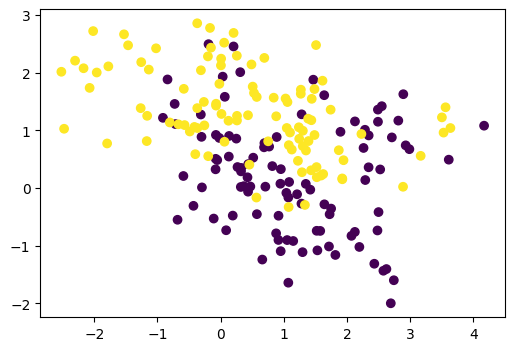

In [34]:
# cargar datos
df = pd.read_csv("ejemplo_dataset.csv")
print(df.head())
# visualizar datos
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df.X1, df.X2, c=df.y)

# dividir datos entre entrenamiento y test
X = df.drop(columns = 'y')
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1), train_size=0.8, random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [35]:
# modelo random forest del ejemplo
rf1 = RandomForestClassifier(random_state=123)
rf1.fit(X_train, y_train)
predicciones1 = rf1.predict(X_test)

C:\Users\eroteta\AppData\Local\Temp\ipykernel_16660\2143966030.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train)


In [36]:
# otro modelo random forest con diferentes hiperparámetros
rf2 = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, min_samples_split=20, random_state=12)
rf2.fit(X_train, y_train)
predicciones2 = rf2.predict(X_test)

C:\Users\eroteta\AppData\Local\Temp\ipykernel_16660\3651309577.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(X_train, y_train)


0.875
0.825


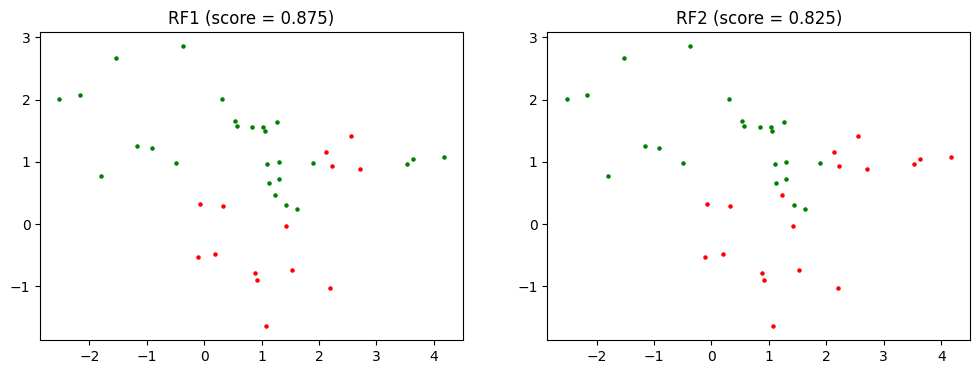

In [37]:
# comparación de los dos modelos de Random Forest
score1 = rf1.score(X_test, y_test)
score2 = rf2.score(X_test, y_test)
# visualizar resultados
colors = {0: 'red', 1:'green'}
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for c in np.unique(df.y):
    i = predicciones1==c
    ax[0].scatter(X_test.loc[i, 'X1'], X_test.loc[i, 'X2'], c=colors[c], s=5)
    i = predicciones2==c
    ax[1].scatter(X_test.loc[i, 'X1'], X_test.loc[i, 'X2'], c=colors[c], s=5)
ax[0].set_title('RF1 (score = ' + str(score1) + ')')
ax[1].set_title('RF2 (score = ' + str(score2) + ')')